In [33]:
# crm 2019
import sys
import os
sys.path.insert(0, os.path.dirname(os.path.abspath('polka')))

In [40]:
import datetime
import logging

import core
from radaraxes import radar_factory

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
logging.basicConfig(level=os.environ.get("LOGLEVEL", "INFO"))
logger = logging.getLogger("ipynb")
date_str = datetime.datetime.now().strftime("%Y%m%d")
dest_name = "DW" + date_str
data_dir = "../dat"
npz_dir = os.path.join(data_dir, date_str + "/")
list_path = os.path.join(data_dir, "users.txt")
image_dir = "../images"

In [27]:
# spotify username authorization or empty for client credentials
sp = core.do_auth("chadrm9")

INFO:core:User chadrm9 authorized!
INFO:core:Client credentialized!


In [5]:
# copy_playlist(sp, username, source_playlist_name, destination_playlist_name, owner)
ss_id = core.copy_playlist(sp, "chadrm9", "Discover Weekly", dest_name, "spotify")

INFO:core:Playlist Discover Weekly copied to DW20190819 for chadrm9


In [41]:
# fetch_user_list(sp, _input_username_list, output_data_dir)
user_list = core.fetch_user_list(sp, list_path, npz_dir)

INFO:core:Loaded chadrm9 from ../dat/20190823/chadrm9.npz
INFO:core:Loaded 1296225797 from ../dat/20190823/1296225797.npz
INFO:core:Loaded x4s7phb9n8c8frmj2d7hfrrce from ../dat/20190823/x4s7phb9n8c8frmj2d7hfrrce.npz
INFO:core:Loaded dudja from ../dat/20190823/dudja.npz


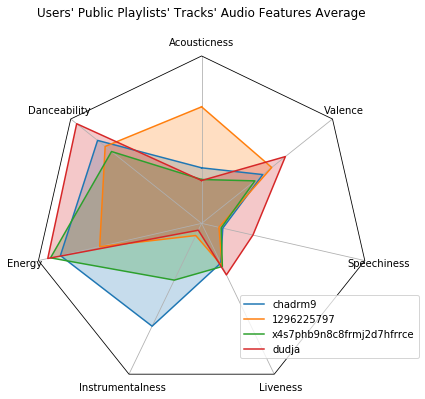

In [42]:
# compute and stack float averages for feature set of each user
np_af_mean_flt = np.vstack([np.mean(user.np_af_flt, axis=0) for user in user_list])

# drop loudness and tempo
np_af_mean_flt = np.delete(np_af_mean_flt, [5, 8], 1)

# build plots
N = len(np_af_mean_flt[0])
theta = radar_factory(N, frame='polygon')

spoke_labels = ['Acousticness', 'Danceability', 'Energy', 'Instrumentalness',
                'Liveness', 'Speechiness', 'Valence']
title = "Users' Public Playlists' Tracks' Audio Features Average"
case_data = np_af_mean_flt

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(projection='radar'))
fig.subplots_adjust(top=0.85, bottom=0.05)

ax.set_rgrids([])
ax.set_title(title,  position=(0.5, 1.1), ha='center')

for d in case_data:
    line = ax.plot(theta, d)
    ax.fill(theta, d,  alpha=0.25)
ax.set_varlabels(spoke_labels)

# username legend tuple
usernames = [''.join(user.username) for user in user_list]
plt.gca().legend(usernames, bbox_to_anchor=(0.6, 0.3))

# ouput plot to file
plt.savefig(os.path.join('../images/', date_str + '_radar.png'))